# Working With Audio

In several subject areas, the ability to create and embed audio tracks in the educational materials bring the materials alive, and complement numerical or visual explanations or demonstrations with audible ones.

Providing tools for converting visual or numerical materials into complementary audible ones may also support improved access, or facilitate the creation of alternative / complemetary offerings. 

This notebook summarises various ways in which audio items can be presented and manipulated inside a Jupyer notebook.

## IPython Audio

The *IPython.display* `Audio` class provides an audio player that can be used to play audio files in a notebook.

For example, we can create a simple application to explore beat frequencies:

In [42]:
#Example via https://ipywidgets.readthedocs.io/en/stable/examples/Beat%20Frequencies.html
from ipywidgets import widgets, interact_manual, interactive
from IPython.display import Audio, display, HTML
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [143]:
def beat_freq(f1=220.0, f2=224.0, rate=8000, max_time=3):
    ''' Add two sine waves of different frequencies together.
    '''
    
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)

    return signal

In [147]:
rate =8000

signal = beat_freq(rate=rate)

Audio(data=signal, rate=rate)

How does it look?

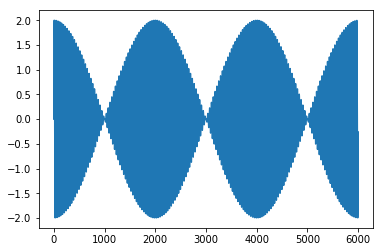

In [149]:
plt.plot(signal[0:6000]);

We can wrap the display of both those components into a single function.

In [219]:
def beat_freq_display(f1=220.0, f2=224.0):
    ''' Add two sine waves of different frequencies to create an audio signal.
        Display the signal as a plot and via an audio player.
        Optionally return the data.
    '''
    rate = 8000
    
    signal = beat_freq(f1, f2, rate)
    
    display(HTML("Let's see what happens if we set f1={}Hz and f2={}Hz:".format(f1,f2)))
    
    plt.plot(signal[0:6000])
    plt.show()
    
    display(HTML("And how does that sound?"))
    
    display(Audio(data=signal, rate=rate))
    return signal

HTML(value="Let's see what happens if we set f1=250Hz and f2=255Hz:")

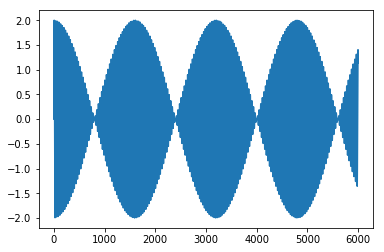

HTML(value='And how does that sound?')

In [220]:
beat_freq_display(250, 255);

We can easily create an interactive around this function using `interact_manual`. Let's see that in action with a customised manual button label.

In [221]:
#This flickers quite badly if we try a simple interactive
v=interactive(beat_freq_display, f1=(200.0,300.0), f2=(200.0,300.0));
display(v)

interactive(children=(FloatSlider(value=220.0, description='f1', max=300.0, min=200.0), FloatSlider(value=224.…

In [204]:
#We do get access to the returned signal value though
v.result

array([ 0.00000000e+00,  3.46966469e-01,  6.83408155e-01, ...,
       -6.83408155e-01, -3.46966469e-01,  3.84296828e-13])

An `interact_manual` control allows us to update the diaplay manually *after* we have set desired slider values.

In [222]:
#Customise the interact_manual button label text
interact_display=interact_manual.options(manual_name="Show me...")

#interact_display could be used as the following decorator for the beat_freq function
#@interact_display(f1=(200.0,300.0), f2=(200.0,300.0))

In [223]:
#The interact_manual lets us only updates when prompted
#However, it also displays the returned value, which me may want to hide

def beat_freq_display_only(f1=220.0, f2=224.0):
    ''' Display beat frquency output but don't return signal. '''
    beat_freq_display(f1,f2)

interact_display(beat_freq_display_only, f1=(200.0,300.0), f2=(200.0,300.0));

interactive(children=(FloatSlider(value=220.0, description='f1', max=300.0, min=200.0), FloatSlider(value=224.…

In [231]:
#The flickering is much reduced in this example, though still annoying
#via https://github.com/jupyter-widgets/ipywidgets/issues/1537
from ipywidgets import IntSlider, Output, VBox, HBox
f1 = FloatSlider(description="f1",min=200, max=300, value=245)
f2 = FloatSlider(description="f2",min=200, max=300, value=250)
output = Output()

def update_plot(change):
    output.clear_output(wait=True)
    rate = 8000
    
    signal = beat_freq(f1.value, f2.value, rate)
    with output:
        plt.plot(signal[0:6000])
        plt.show()

        display(Audio(data=signal, rate=rate))

f1.observe(update_plot, 'value')
f2.observe(update_plot, 'value')

update_plot(None)
HBox([VBox([f1, f2]), output])

The signal is available to us for further processing by calling the signal generator function with the frequency slider values:

In [226]:
beat_freq(f1.value, f2.value, rate)

array([ 0.00000000e+00,  3.86343509e-01,  7.58128984e-01, ...,
       -7.58128984e-01, -3.86343509e-01, -4.13458091e-13])

## `librosa`

In [ ]:
%%capture
try:
    import librosa
except:
    !pip install librosa

In [3]:
import librosa